#Deep and Wide Neural Networks

## Wide Neural Networks

###Wide layers

####Summaries

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

inpt_dim = 32*32*3    # this corresponds to the dataset
                      # to be explained shortly
inpt_vec = Input(shape=(inpt_dim,), name='inpt_vec')
dl = Dropout(0.5, name='d1')(inpt_vec)
l1 = Dense(inpt_dim, activation='relu', name='l1')(dl)
d2 = Dropout(0.2, name='d2')(l1)
l2 = Dense(inpt_dim, activation='relu', name='l2') (d2)
output = Dense(10, activation='sigmoid', name='output') (l2)

widenet = Model(inpt_vec, output, name='widenet')

widenet.compile(loss='binary_crossentropy', optimizer='adam')
widenet.summary()

widenet.save("blank_widenet.hdf5")

Model: "widenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpt_vec (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
d1 (Dropout)                 (None, 3072)              0         
_________________________________________________________________
l1 (Dense)                   (None, 3072)              9440256   
_________________________________________________________________
d2 (Dropout)                 (None, 3072)              0         
_________________________________________________________________
l2 (Dense)                   (None, 3072)              9440256   
_________________________________________________________________
output (Dense)               (None, 10)                30730     
Total params: 18,911,242
Trainable params: 18,911,242
Non-trainable params: 0
_______________________________________________

###The CIFAR-10 dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Makes images floats between [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshapes images to make them vectors of 3072-dimensions
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Converts list of numbers into one-hot encoded vectors of 10-dim
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 3072)
x_test shape: (10000, 3072)


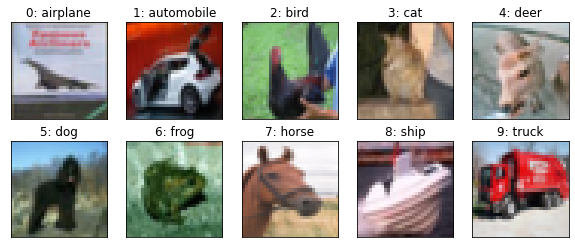

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(_, _), (_, labels) = cifar10.load_data()
idx = []
k = 0
i = 0
while i < 10:
  if labels[k] == i:
    idx.append(k)
    i += 1
  k += 1

clsmap = {0: 'airplane',
          1: 'automobile', 
          2: 'bird', 
          3: 'cat', 
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}

plt.figure(figsize=(10,4))
for i, (img, y) in enumerate(zip(x_test[idx[0:10]].reshape(10, 32, 32, 3), labels[idx[0:10]])):
  plt.subplot(2, 5, i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y[0]) + ": " + clsmap[y[0]])
plt.savefig('ch.11.cifar10.samples.png', bbox_inches='tight', dpi=350)
plt.show()


###New training tools

In [ ]:
widenet.fit(x_train, y_train, epochs=100, batch_size=1000, 
            shuffle=True, validation_data=(x_test, y_test))

Epoch 1/100
50/50 [==============================] - 2s 35ms/step - loss: 0.4175 - val_loss: 0.3010
Epoch 2/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2935 - val_loss: 0.2796
Epoch 3/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2800 - val_loss: 0.2687
Epoch 4/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2714 - val_loss: 0.2606
Epoch 5/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2661 - val_loss: 0.2526
Epoch 6/100
50/50 [==============================] - 2s 34ms/step - loss: 0.2617 - val_loss: 0.2475
Epoch 7/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2575 - val_loss: 0.2469
Epoch 8/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2539 - val_loss: 0.2416
Epoch 9/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2508 - val_loss: 0.2376
Epoch 10/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2476 - val_loss: 0.2384

####Saving or loading models

In [ ]:
widenet.save_weights("widenet.hdf5")

In [ ]:
widenet.load_weights("widenet.hdf5")

In [ ]:
widenet.save("widenet.hdf5")

In [ ]:
from tensorflow.keras.models import load_model

widenet = load_model("widenet.hdf5")

####Reducing the learning rate on the fly

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20)

widenet.fit(x_train, y_train, batch_size=128, epochs=100, 
            callbacks=reduce_lr, shuffle=True, 
            validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2323 - val_loss: 0.2277
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2196 - val_loss: 0.2211
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2135 - val_loss: 0.2155
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2102 - val_loss: 0.2163
Epoch 5/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2080 - val_loss: 0.2164
Epoch 6/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2066 - val_loss: 0.2150
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2048 - val_loss: 0.2164
Epoch 8/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2033 - val_loss: 0.2122
Epoch 9/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2035 - val_loss: 0.2152
Epoch 10/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2026 - val_lo

####Stopping the learning process early

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
stop_alg = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

widenet.fit(x_train, y_train, batch_size=128, epochs=1000, 
            callbacks=stop_alg, shuffle=True, 
            validation_data=(x_test, y_test))

Epoch 1/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1594 - val_loss: 0.2103
Epoch 2/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1589 - val_loss: 0.2103
Epoch 3/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1597 - val_loss: 0.2103
Epoch 4/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1593 - val_loss: 0.2103
Epoch 5/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1598 - val_loss: 0.2103
Epoch 6/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1588 - val_loss: 0.2103
Epoch 7/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1588 - val_loss: 0.2103
Epoch 8/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1592 - val_loss: 0.2103
Epoch 9/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.1592 - val_loss: 0.2103
Epoch 10/1000
391/391 [==============================] - 3s 8ms/step - loss: 0.159

... and all together

In [ ]:
widenet = load_model("blank_widenet.hdf5")

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20)
stop_alg = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

hist = widenet.fit(x_train, y_train, batch_size=1000, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

widenet.save_weights("widenet.hdf5")

Epoch 1/1000
50/50 [==============================] - 2s 35ms/step - loss: 0.4218 - val_loss: 0.3028
Epoch 2/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2930 - val_loss: 0.2771
Epoch 3/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2785 - val_loss: 0.2658
Epoch 4/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2708 - val_loss: 0.2562
Epoch 5/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2642 - val_loss: 0.2525
Epoch 6/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2610 - val_loss: 0.2495
Epoch 7/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2563 - val_loss: 0.2443
Epoch 8/1000
50/50 [==============================] - 2s 34ms/step - loss: 0.2537 - val_loss: 0.2425
Epoch 9/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2502 - val_loss: 0.2353
Epoch 10/1000
50/50 [==============================] - 2s 33ms/step - loss: 0.2473 - val_lo

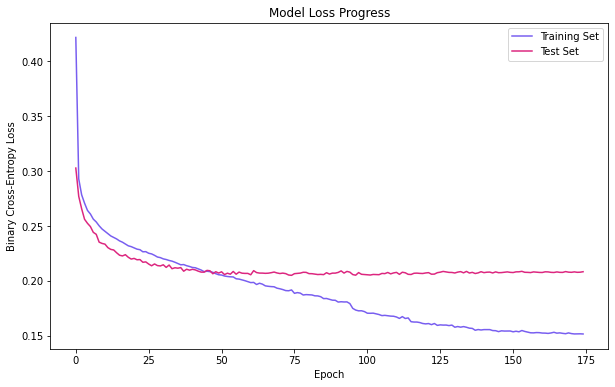

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.11.wn.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()


###Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import numpy as np

y_hat = widenet.predict(x_test)    # we take the neuron with maximum
y_pred = np.argmax(y_hat, axis=1)  # output as our prediction

y_true = np.argmax(y_test, axis=1)   # this is the ground truth
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print(classification_report(y_true, y_pred, labels=labels))

cm = confusion_matrix(y_true, y_pred, labels=labels)
print(cm)

ber = 1- balanced_accuracy_score(y_true, y_pred)
print('BER:', ber)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1000
           1       0.69      0.63      0.66      1000
           2       0.52      0.38      0.44      1000
           3       0.36      0.35      0.36      1000
           4       0.47      0.47      0.47      1000
           5       0.51      0.37      0.42      1000
           6       0.46      0.74      0.57      1000
           7       0.67      0.57      0.62      1000
           8       0.62      0.69      0.66      1000
           9       0.60      0.61      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000

[[628  23  44  26  34   7  36  20 137  45]
 [ 33 628   7  29  15  11  29  13  74 161]
 [ 74  14 384  95 147  41 157  43  27  18]
 [ 29  12  58 355  59 154 223  40  26  44]
 [ 49   8  96  54 475  33 179  65  28  13]
 [ 20   9  62 224  73 366 

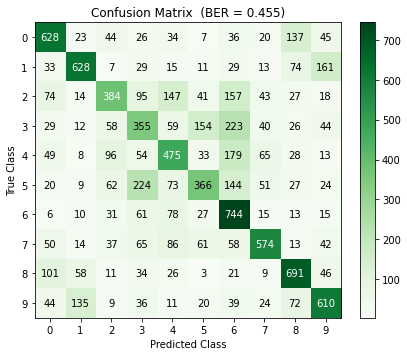

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
       yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       title='Confusion Matrix  (BER = {0:0.3f})'.format(ber),
       ylabel='True Class',
       xlabel='Predicted Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
np.set_printoptions(precision=2)
plt.axis('tight')
plt.savefig('ch.11.wn.cifar10.cm.png', dpi=350, bbox_inches='tight')
plt.show()


## Dense deep neural networks

###Building and training the model

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

inpt_dim = 32*32*3

inpt_vec = Input(shape=(inpt_dim,))

units = inpt_dim
dr = 0.5
dl = Dropout(dr)(inpt_vec)
dl = Dense(units, activation='relu')(dl)

units = units//2
dr = dr/2
while units>10:  
  dl = Dropout(dr)(dl)
  dl = Dense(units, activation='relu')(dl)
  units = units//2
  dr = dr/1.5

output = Dense(10, activation='sigmoid')(dl)

deepnet = Model(inpt_vec, output)

deepnet.compile(loss='binary_crossentropy', optimizer='adam')
deepnet.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20,  
                              min_delta=1e-4, mode='min')

stop_alg = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

hist = deepnet.fit(x_train, y_train, batch_size=1000, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

deepnet.save_weights("deepnet.hdf5")

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dropout_1 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 768)              

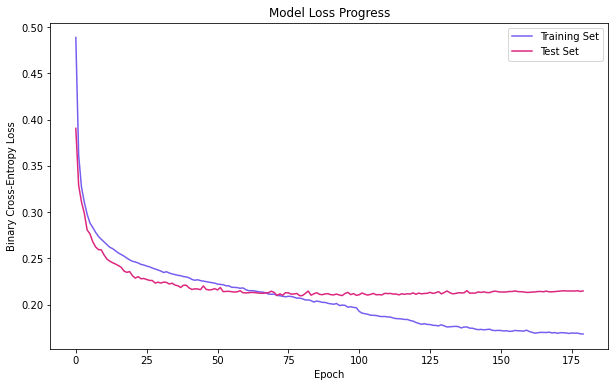

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.11.dn.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()


####Results

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(10000, 10)
(10000,)
[ 0.04  0.05  0.08 -0.66  0.09  0.19  0.07  0.05  0.08  0.02]
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      1000
           1       0.68      0.59      0.63      1000
           2       0.40      0.36      0.38      1000
           3       0.38      0.39      0.38      1000
           4       0.43      0.44      0.44      1000
           5       0.48      0.34      0.40      1000
           6       0.48      0.66      0.55      1000
           7       0.63      0.58      0.60      1000
           8       0.59      0.69      0.64      1000
           9       0.60      0.60      0.60      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000

[[596  25  68  19  41   7  24  19 167  34]
 [ 29 594   7  32  16  14  24  20  90 174]
 [ 68  11 356  94 169  57 143  52  31  19]
 [ 24  17  80 385  60 155 172

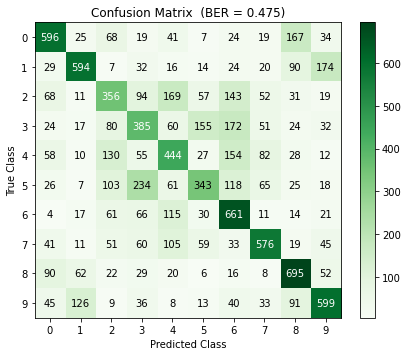

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np

(_, _), (_, labels) = cifar10.load_data()

y_ = labels
y_hat = deepnet.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)

print(y_hat.shape)
print(y_pred.shape)

print(y_hat[0] - y_test[0])
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(cm)
ber = 1- balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))
print('BER', ber)

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # add class labels
       xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
       yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       title='Confusion Matrix  (BER = {0:0.3f})'.format(ber),
       ylabel='True Class',
       xlabel='Predicted Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
np.set_printoptions(precision=2)
plt.axis('tight')
plt.savefig('ch.11.dn.cifar10.cm.png', dpi=350, bbox_inches='tight')
plt.show()


##Sparse deep neural networks

###Building a sparse network and training it

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

inpt_dim = 32*32*3

inpt_vec = Input(shape=(inpt_dim,))

units = inpt_dim
dr = 0.25
dl = Dropout(dr)(inpt_vec)
dl = Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(dl)

units = units//2
dr = dr/1.125
while units>10:  
  dl = Dropout(dr)(dl)
  dl = Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(dl)
  units = units//2
  dr = dr/1.125

output = Dense(10, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))(dl)

sparsenet = Model(inpt_vec, output)

optmzr = Adam(lr=0.00001)
sparsenet.compile(loss='binary_crossentropy', optimizer=optmzr)
sparsenet.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20)

stop_alg = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

hist = sparsenet.fit(x_train, y_train, batch_size=128, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

sparsenet.save_weights("sparsenet.hdf5")

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dropout_10 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 768)              

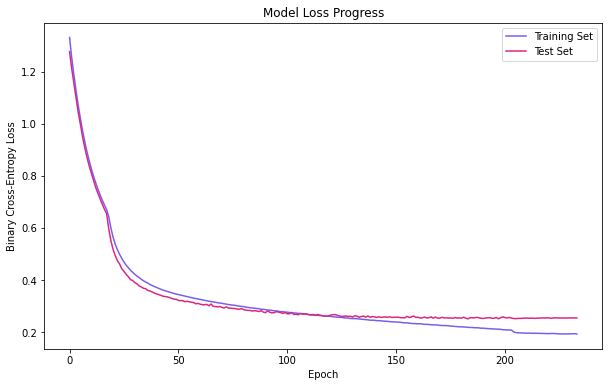

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.11.sn.cifar10.loss.png', dpi=350, bbox_inches='tight')
plt.show()


(10000, 10)
(10000,)
[ 0.01  0.01  0.21 -0.66  0.15  0.24  0.05  0.14  0.    0.01]
              precision    recall  f1-score   support

           0       0.62      0.65      0.64      1000
           1       0.72      0.64      0.68      1000
           2       0.37      0.26      0.31      1000
           3       0.32      0.22      0.26      1000
           4       0.43      0.48      0.46      1000
           5       0.43      0.52      0.47      1000
           6       0.56      0.67      0.61      1000
           7       0.59      0.69      0.64      1000
           8       0.67      0.69      0.68      1000
           9       0.62      0.59      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.53      0.54      0.53     10000
weighted avg       0.53      0.54      0.53     10000

[[654   8  62   7  29  14  26  21 127  52]
 [ 25 641   3   3  20  33   8  27  84 156]
 [106   9 260 107 175  91 138  79  12  23]
 [ 24   9  78 224  90 335 125

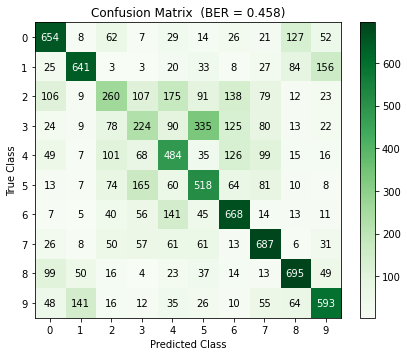

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np

(_, _), (_, labels) = cifar10.load_data()

y_ = labels
y_hat = sparsenet.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)

print(y_hat.shape)
print(y_pred.shape)

print(y_hat[0] - y_test[0])
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(cm)
ber = 1- balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))
print('BER', ber)

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
       yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       title='Confusion Matrix  (BER = {0:0.3f})'.format(ber),
       ylabel='True Class',
       xlabel='Predicted Class')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
np.set_printoptions(precision=2)
plt.axis('tight')
plt.savefig('ch.11.sn.cifar10.cm.png', dpi=350, bbox_inches='tight')
plt.show()


In [ ]:
ww = widenet.get_weights()
dw = deepnet.get_weights()
sw = sparsenet.get_weights()

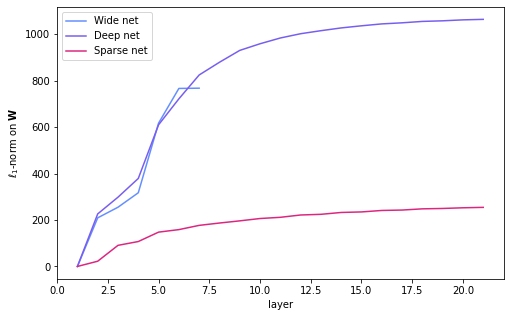

In [ ]:
fig = plt.figure(figsize=(8,5))
wh = [0.0]
dh = [0.0]
sh = [0.0]

for i in range(np.max([len(ww), len(dw), len(sw)])):
  if i < len(ww):
    wh.append(wh[-1]+np.linalg.norm(ww[i], ord=1))
  else:
    wh.append(np.NaN)
  dh.append(dh[-1]+np.linalg.norm(dw[i], ord=1))
  sh.append(sh[-1]+np.linalg.norm(sw[i], ord=1))
plt.plot([i+1 for i in range(len(wh))], wh, color='#648fff', label='Wide net')
plt.plot([i+1 for i in range(len(wh))], dh, color='#785ef0', label='Deep net')
plt.plot([i+1 for i in range(len(wh))], sh, color='#dc267f', label='Sparse net')
plt.xlabel('layer')
plt.ylabel('$\ell_1$-norm on $\mathbf{W}$')
plt.legend()
plt.show()

##Hyper-Parameter Optimization


*   Dropout rate: 0.2, 0.5
*   Optimizer: rmsprop, adam
  * Learning rate: 0.01, 0.0001
* Neurons in hidden layers: 1024, 512, 256



###Implementation and results

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def create_model(dr=0.0, optimizer='adam', lr=0.001, units=128):
  inpt_dim = 32*32*3

  inpt_vec = Input(shape=(inpt_dim,))
  dl = Dropout(dr)(inpt_vec)
  l1 = Dense(units, activation='relu')(dl)
  dl = Dropout(dr)(l1)
  l2 = Dense(units, activation='relu') (dl)
  output = Dense(10, activation='sigmoid') (l2)

  widenet = Model(inpt_vec, output)

  if optimizer == 'adam':
    optmzr = Adam(learning_rate=lr)
  else:
    optmzr = RMSprop(learning_rate=lr)
  
  widenet.compile(loss='binary_crossentropy', optimizer=optmzr, metrics=['accuracy'])
  
  return widenet

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=1000, 
                        verbose=0)

dropout_rates = [0.2, 0.5]
optimizers = ['adam', 'rmsprop']
learning_rates = [0.01, 0.0001]
units = [1024, 512, 256]

param_grid = dict(dr=dropout_rates, optimizer=optimizers, lr=learning_rates, units=units)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose=2)
grid_result = grid.fit(x_train, y_train, validation_split=0.3,
                       callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
                                  ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)])

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] dr=0.2, lr=0.01, optimizer=adam, units=1024 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... dr=0.2, lr=0.01, optimizer=adam, units=1024, total=  21.1s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=1024 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s remaining:    0.0s


[CV] ...... dr=0.2, lr=0.01, optimizer=adam, units=1024, total=  29.2s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=1024 .....................
[CV] ...... dr=0.2, lr=0.01, optimizer=adam, units=1024, total=  30.0s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=512 ......................
[CV] ....... dr=0.2, lr=0.01, optimizer=adam, units=512, total=  24.4s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=512 ......................
[CV] ....... dr=0.2, lr=0.01, optimizer=adam, units=512, total=  22.5s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=512 ......................
[CV] ....... dr=0.2, lr=0.01, optimizer=adam, units=512, total=  25.0s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=256 ......................
[CV] ....... dr=0.2, lr=0.01, optimizer=adam, units=256, total=  23.9s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=256 ......................
[CV] ....... dr=0.2, lr=0.01, optimizer=adam, units=256, total=  23.9s
[CV] dr=0.2, lr=0.01, optimizer=adam, units=256 ......................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 26.4min finished


Best: 0.516380 using {'dr': 0.2, 'lr': 0.0001, 'optimizer': 'adam', 'units': 1024}
0.374940 (0.010450) with: {'dr': 0.2, 'lr': 0.01, 'optimizer': 'adam', 'units': 1024}
0.410940 (0.020179) with: {'dr': 0.2, 'lr': 0.01, 'optimizer': 'adam', 'units': 512}
0.424760 (0.005233) with: {'dr': 0.2, 'lr': 0.01, 'optimizer': 'adam', 'units': 256}
0.379540 (0.006558) with: {'dr': 0.2, 'lr': 0.01, 'optimizer': 'rmsprop', 'units': 1024}
0.376021 (0.030265) with: {'dr': 0.2, 'lr': 0.01, 'optimizer': 'rmsprop', 'units': 512}
0.350120 (0.012792) with: {'dr': 0.2, 'lr': 0.01, 'optimizer': 'rmsprop', 'units': 256}
0.516380 (0.003471) with: {'dr': 0.2, 'lr': 0.0001, 'optimizer': 'adam', 'units': 1024}
0.499420 (0.003157) with: {'dr': 0.2, 'lr': 0.0001, 'optimizer': 'adam', 'units': 512}
0.479840 (0.005775) with: {'dr': 0.2, 'lr': 0.0001, 'optimizer': 'adam', 'units': 256}
0.488980 (0.007636) with: {'dr': 0.2, 'lr': 0.0001, 'optimizer': 'rmsprop', 'units': 1024}
0.483200 (0.007684) with: {'dr': 0.2, 'lr':